In [2]:
%load_ext autoreload
%autoreload 2


import mahotas as mh
import numpy as np
import os
import time

from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
%matplotlib inline

import mlproof as mlp

mlproof/tifffile.py:1995: UserWarning: failed to import _tifffile.decodepackbits
  warnings.warn("failed to import %s" % module_function)
mlproof/tifffile.py:1995: UserWarning: failed to import _tifffile.decodelzw
  warnings.warn("failed to import %s" % module_function)
mlproof/tifffile.py:1995: UserWarning: failed to import _tifffile.unpackints
  warnings.warn("failed to import %s" % module_function)


In [6]:
PATCH_PATH = '/home/d/patches/cylinder2/'

In [7]:
def generate_patches(start_slice, end_slice):

    patch_index = 0

    all_patches_count = 0
    all_error_patches = []
    all_correct_patches = []
    
    for z in range(start_slice, end_slice):

        t0 = time.time()
        print 'working on slice', z
        input_image, input_prob, input_mask, input_gold, input_rhoana = mlp.Util.read_section('/home/d/data/cylinderNEW/',z)

        error_patches, patches = mlp.Patch.patchify_maxoverlap(input_image, input_prob, input_mask, input_rhoana, input_gold, sample_rate=1)

        print 'Generated', len(error_patches), 'split error patches and', len(patches), ' correct patches in', time.time()-t0, 'seconds.'
        
        
        all_error_patches += error_patches
        all_correct_patches += patches
        
    
    
    NO_PATCHES = len(all_error_patches) + len(all_correct_patches)

    print 'We have a total of',NO_PATCHES,'patches.'
    print 'Errors:',len(all_error_patches)
    print 'Correct:',len(all_correct_patches)    
    
    PATCH_BYTES = 75*75
    P_SIZE = (NO_PATCHES, 1, 75,75) # rather than raveled right now
    
    p_image = np.zeros(P_SIZE, dtype=np.float32)
    p_prob = np.zeros(P_SIZE, dtype=np.float32)
    p_binary = np.zeros(P_SIZE, dtype=np.bool)
    p_merged_array = np.zeros(P_SIZE, dtype=np.bool)
#     p_dyn_obj = np.zeros((NO_PATCHES, PATCH_BYTES),dtype=np.bool)
#     p_dyn_bnd = np.zeros((NO_PATCHES, PATCH_BYTES),dtype=np.bool)
    p_border_overlap = np.zeros(P_SIZE, dtype=np.bool)
    p_larger_border_overlap = np.zeros(P_SIZE, dtype=np.bool)    
    p_target = np.zeros(NO_PATCHES)


    i = 0
    for p in all_error_patches:
        
        p_image[i] = (p['image'].astype(np.float32)/255.)#.ravel()
        p_prob[i] = 1. - (p['prob'].astype(np.float32)/255.)#.ravel()
        p_binary[i] = p['binary']#.ravel()
        p_merged_array[i] = p['merged_array']#.ravel()
#         p_dyn_obj[i] = p['dyn_obj'].ravel()
#         p_dyn_bnd[i] = p['dyn_bnd'].ravel()
        p_border_overlap[i] = p['border_overlap']#.ravel()
        p_larger_border_overlap[i] = p['larger_border_overlap']#.ravel()
        p_target[i] = 1 # <--- important
        i += 1

        
    for p in all_correct_patches:

        p_image[i] = (p['image'].astype(np.float32)/255.)#.ravel()
        p_prob[i] = 1. - (p['prob'].astype(np.float32)/255.)#.ravel()
        p_binary[i] = p['binary']#.ravel()
        p_merged_array[i] = p['merged_array']#.ravel()
#         p_dyn_obj[i] = p['dyn_obj'].ravel()
#         p_dyn_bnd[i] = p['dyn_bnd'].ravel()
        p_border_overlap[i] = p['border_overlap']#.ravel()
        p_larger_border_overlap[i] = p['larger_border_overlap']#.ravel()
        p_target[i] = 0 # <--- important
        i+=1
        
    
#     return p_image, p_prob, p_binary, p_merged_array, p_dyn_obj, p_dyn_bnd, p_border_overlap, p_larger_border_overlap, p_target
    return p_image, p_prob, p_binary, p_merged_array, p_border_overlap, p_larger_border_overlap, p_target



def shuffle_in_unison_inplace(a, b, c, d, e, f, g):
    assert len(a) == len(b)
    assert len(a) == len(g)
    p = np.random.permutation(len(a))
    return a[p], b[p], c[p], d[p], e[p], f[p], g[p]



def run(start_slice, end_slice, filename):
    
    if not os.path.exists(PATCH_PATH):
        os.makedirs(PATCH_PATH)
    
    p = generate_patches(start_slice, end_slice)
    
    shuffled = shuffle_in_unison_inplace(p[0],
                                         p[1],
                                         p[2],
                                         p[3],
                                         p[4],
                                         p[5],
                                         p[6]
                                        )
    
    print 'saving..'
    np.savez(PATCH_PATH+filename+'.npz', image=shuffled[0],
                                         prob=shuffled[1],
                                         binary=shuffled[2],
                                         merged_array=shuffled[3],
#                                          dyn_obj=shuffled[4],
#                                          dyn_bnd=shuffled[5],
                                         border_overlap=shuffled[4],
                                         larger_border_overlap=shuffled[5])
    np.savez(PATCH_PATH+filename+'_targets.npz', targets=shuffled[6])
    print 'Done!'
    
#     return correct, split, shuffled


In [8]:
run(0,250, 'train')
run(250,300, 'test')

working on slice 0
Loading z00000000.png
Generated 0 split error patches and 0  correct patches in 1.37143802643 seconds.
working on slice 1
Loading z00000001.png
Generated 0 split error patches and 0  correct patches in 1.06982898712 seconds.
working on slice 2
Loading z00000002.png
Generated 0 split error patches and 0  correct patches in 1.06148004532 seconds.
working on slice 3
Loading z00000003.png
Generated 0 split error patches and 0  correct patches in 1.08127093315 seconds.
working on slice 4
Loading z00000004.png
Generated 0 split error patches and 0  correct patches in 1.06893706322 seconds.
working on slice 5
Loading z00000005.png
Generated 0 split error patches and 0  correct patches in 1.06321501732 seconds.
working on slice 6
Loading z00000006.png
Generated 0 split error patches and 0  correct patches in 1.09116482735 seconds.
working on slice 7
Loading z00000007.png
Generated 0 split error patches and 0  correct patches in 1.21591377258 seconds.
working on slice 8
Loadi

In [18]:
X_train, y_train, X_test, y_test = mlp.Patch.load('cylinder1')

Loaded /home/d/patches//cylinder1/ in 0.280543088913 seconds.


In [10]:
len(X_train['image'])

225520

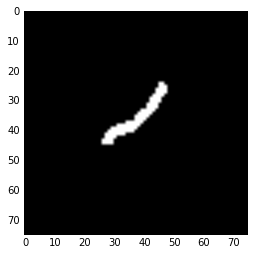

In [17]:
imshow(X_train['border_overlap'][10].reshape(75,75), cmap='gray')

In [20]:
len(y_train)


532176

In [21]:
len(y_test)

26816